In [6]:
import numpy as np
import qutip
import pickle
import multi_stages as ms
import stages
import matplotlib.pyplot as plt

In [7]:
import multi_stages_config as config


states_infty_list = []
pstates_infty_list = []
for sim in config.sim_list:
    f = open(f"data/Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    states_infty_list.append(data[1])

    pstates_infty = []
    for state in data[1]:
        pstate = state.ptrace(0)
        pstates_infty.append(pstate)
    pstates_infty_list.append(pstates_infty)


In [8]:
# b = qutip.Bloch()
# b.add_states(pstates_infty_list[0])
# b.show()


/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)
/home/seve/Uni/Msc-unitn/Thesis/Zeno/quantum-zeni/stages.py:42: RuntimeWarning: invalid value encountered in power
  N = lmbd * np.power(n/d, lmbd/gamma)


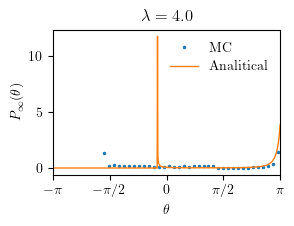

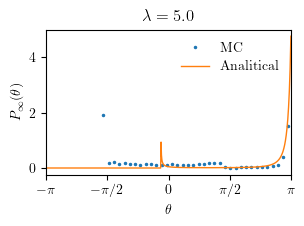

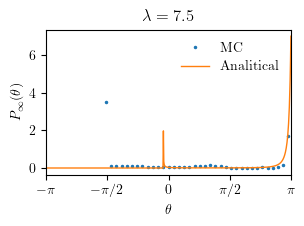

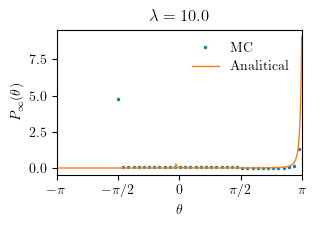

In [9]:
for sim, pstates_infty in zip(config.sim_list, pstates_infty_list):
    plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])
    plt.figure()

    thetas = []
    for pstate in pstates_infty:
        thetas.append(stages.state_to_theta(pstate))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=r"MC")
    plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(sim.lmbd, np.arange(-np.pi, np.pi, .01)), label=r"Analitical")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend()
    plt.title(rf"$\lambda = {sim.lmbd}$")

    plt.tight_layout()

    plt.savefig(f"plots/Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}.pdf")

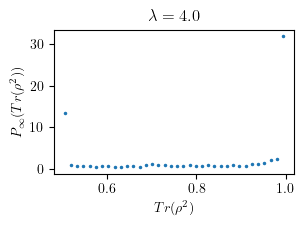

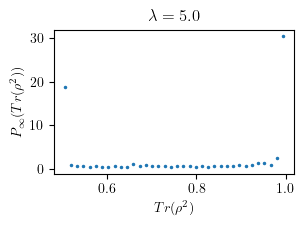

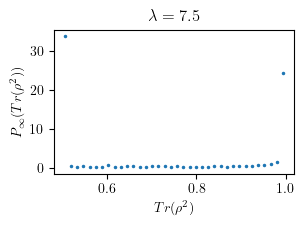

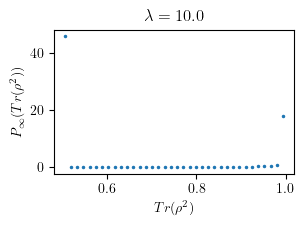

In [10]:
for sim, pstates_infty in zip(config.sim_list, pstates_infty_list):
    plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])
    plt.figure()

    trace_rho2 = []
    for pstate in pstates_infty:
        rho2 = pstate * pstate
        trace_rho2.append(rho2.tr())

    counts, bins = np.histogram(trace_rho2, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=r"MC")
    # plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(sim.lmbd, np.arange(-np.pi, np.pi, .01)), label=r"Analitical")

    # plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    # plt.xticks(xticks, xlabels)
    plt.xlabel(r"$Tr(\rho^2)$")
    plt.ylabel(r"$P_\infty(Tr(\rho^2))$")
    # plt.legend()
    plt.title(rf"$\lambda = {sim.lmbd}$")

    plt.tight_layout()

    plt.savefig(f"plots/TrRho2-Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}.pdf")

In [13]:
states_infty_list[0][0]#.ptrace(0)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.79538891+0.j        ]
 [0.        +0.42249727j]
 [0.        +0.42249727j]
 [0.10172804+0.j        ]]